In [45]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', palette='pastel')

# Montando DataFrame

In [2]:
dias = [
    '2022-01-31',
    '2022-02-01', 
    '2022-02-02', 
    '2022-02-03', 
    '2022-02-04',
    '2022-02-05',
    '2022-02-06',
]

df = pd.DataFrame()

for dia in dias:
    with open(f'datalake/extract_date={dia}.json') as file:
        text_id = []
        user_id = []
        user_name = []
        number_of_followers = []
        retweeted_text_id = []
        retweeted_text = []
        retweeted_user_id = []
        retweeted_user_name = []
        retweeted_user_number_of_followers = []
        retweet_count = []
        search_tweets = json.load(file)
        for tweet in search_tweets:
            text_id.append(tweet['id'])
            user_id.append(tweet['user']['id'])
            user_name.append(tweet['user']['screen_name'])
            number_of_followers.append(tweet['user']['followers_count'])
            retweeted_text_id.append(tweet['retweeted_status']['id'])
            retweeted_text.append(tweet['retweeted_status']['text'])
            retweeted_user_id.append(tweet['retweeted_status']['user']['id'])
            retweeted_user_name.append(tweet['retweeted_status']['user']['screen_name'])
            retweeted_user_number_of_followers.append(tweet['retweeted_status']['user']['followers_count'])
            retweet_count.append(tweet['retweeted_status']['retweet_count'])
        _ = pd.DataFrame(list(zip(
            text_id, user_id, user_name, number_of_followers,
            retweeted_text_id, retweeted_text, retweeted_user_id,
            retweeted_user_name, retweeted_user_number_of_followers,
            retweet_count
        )))        
    df = pd.concat([df, _], axis=0)

map = {
    0: 'text_id', 1: 'user_id', 2: 'user_name', 3: 'number_of_followers',
    4: 'retweeted_text_id', 5: 'retweeted_text', 6: 'retweeted_user_id',
    7: 'retweeted_user_name', 8: 'retweeted_user_number_of_followers',
    9: 'retweet_count'
}
df = df.rename(columns=map)

# Pré-análise

In [3]:
print(f'Quantidade de linhas: {df.shape[0]}')
print(f'Quantidade de colunas: {df.shape[1]}')

Quantidade de linhas: 3168
Quantidade de colunas: 10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 433
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   text_id                             3168 non-null   int64 
 1   user_id                             3168 non-null   int64 
 2   user_name                           3168 non-null   object
 3   number_of_followers                 3168 non-null   int64 
 4   retweeted_text_id                   3168 non-null   int64 
 5   retweeted_text                      3168 non-null   object
 6   retweeted_user_id                   3168 non-null   int64 
 7   retweeted_user_name                 3168 non-null   object
 8   retweeted_user_number_of_followers  3168 non-null   int64 
 9   retweet_count                       3168 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 272.2+ KB


In [5]:
df['text_id'] = df['text_id'].astype('str')
df['user_id'] = df['user_id'].astype('str')
df['user_name'] = df['user_name'].astype('str')
df['retweeted_text_id'] = df['retweeted_text_id'].astype('str')
df['retweeted_text'] = df['retweeted_text'].astype('str')
df['retweeted_user_id'] = df['retweeted_user_id'].astype('str')
df['retweeted_user_name'] = df['retweeted_user_name'].astype('str')

In [6]:
df.describe(include='O')

,text_id,user_id,user_name,retweeted_text_id,retweeted_text,retweeted_user_id,retweeted_user_name
count,3168,3168,3168,3168,3168,3168,3168
unique,900,869,869,218,218,181,181
top,1487735300818407425,1284133047344955393,FabimBrasil,1487558809220435971,Militares pedem explicações do TSE sobre trans...,1090291692744466433,SigaGazetaBR
freq,7,21,21,778,778,1013,1013


# Análise Exploratória de Dados

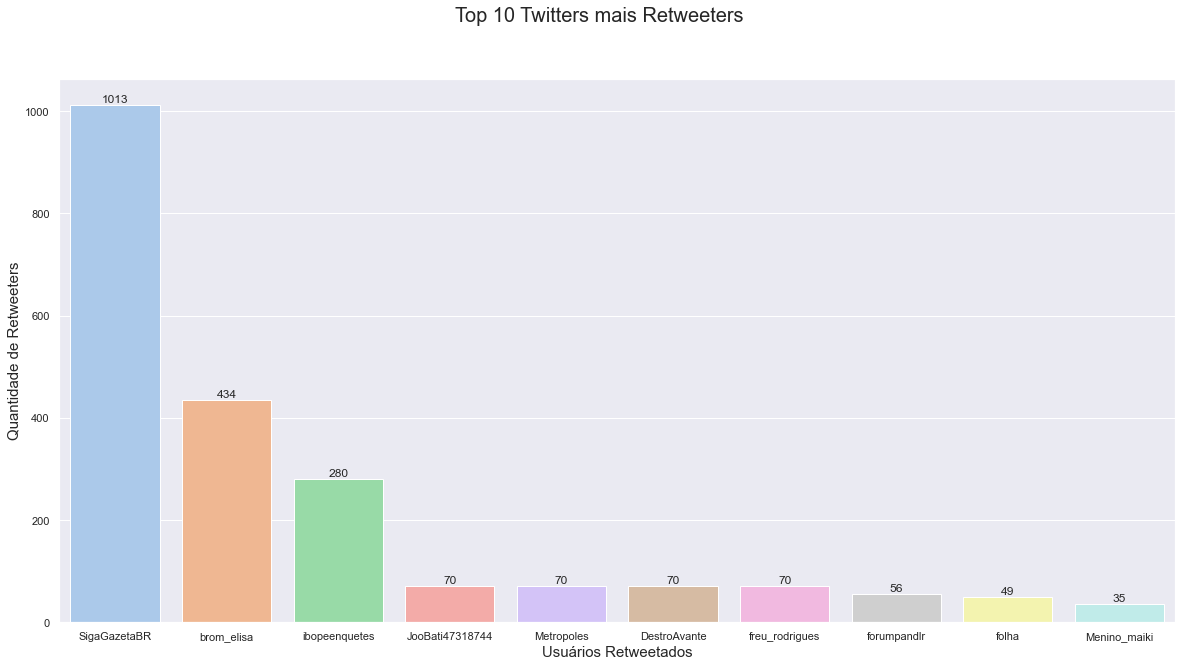

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
fig.suptitle('Top 10 Twitters mais Retweeters', fontsize=20)

# Top 10 usuários mais retweetados
_ = df.copy()
_['count'] = 1
_ = _.groupby(['retweeted_user_id', 'retweeted_user_name']).sum()
_ = _[['count']].sort_values('count', ascending=False).head(10).reset_index()

sns.barplot(data = _, x = 'retweeted_user_name', y = 'count', ax = ax)
ax.set_ylabel('Quantidade de Retweeters', fontsize=15)
ax.set_xlabel('Usuários Retweetados', fontsize=15)
for p in ax.patches:
    try:
        a = int(p.get_height())
        if a != 0:
            ax.annotate('{0:2d}'.format(a), (p.get_x() + 0.4, p.get_height() + 5), ha='center')   
        else:
            continue
    except:
        continue

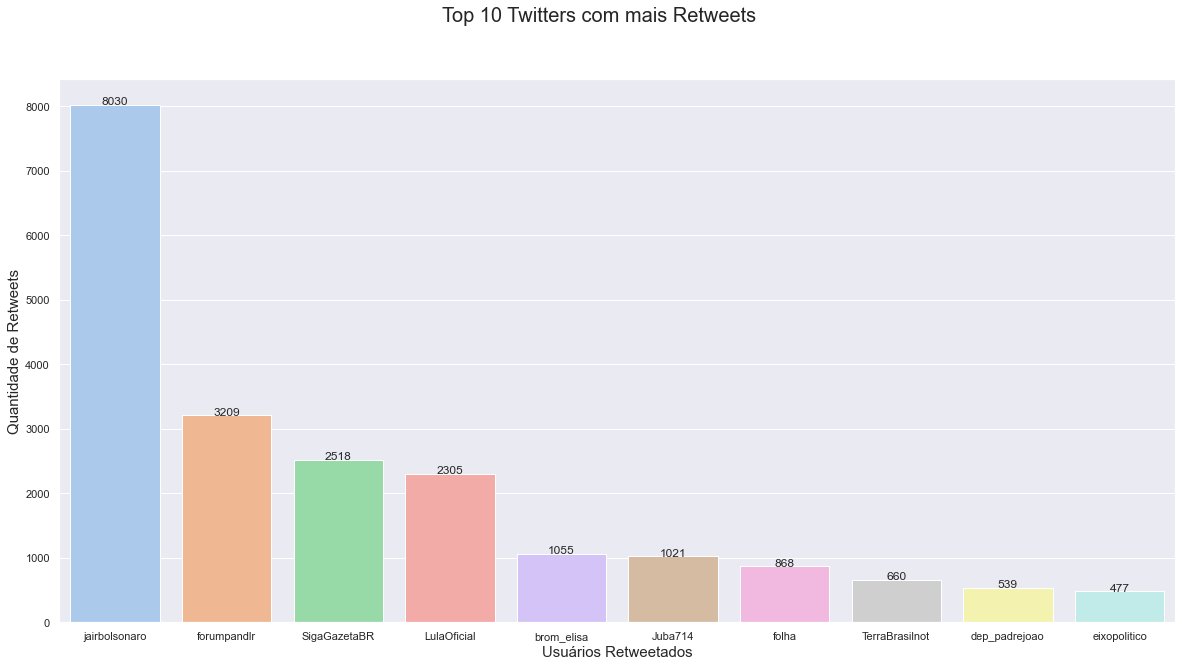

In [81]:
# Top 10 Twitters com mais Retweets
fig, ax = plt.subplots(1, 1, figsize=(20,10))
fig.suptitle('Top 10 Twitters com mais Retweets', fontsize=20)

_ = df.copy()
_ = _[['retweeted_user_name', 'retweeted_text', 'retweet_count']]
_ = _.drop_duplicates().groupby('retweeted_user_name').sum().\
    reset_index().sort_values('retweet_count', ascending=False).head(10)

sns.barplot(data = _, x = 'retweeted_user_name', y = 'retweet_count', ax = ax)
ax.set_ylabel('Quantidade de Retweets', fontsize=15)
ax.set_xlabel('Usuários Retweetados', fontsize=15)
for p in ax.patches:
    try:
        a = int(p.get_height())
        if a != 0:
            ax.annotate('{0:2d}'.format(a), (p.get_x() + 0.4, p.get_height() + 5), ha='center')   
        else:
            continue
    except:
        continue

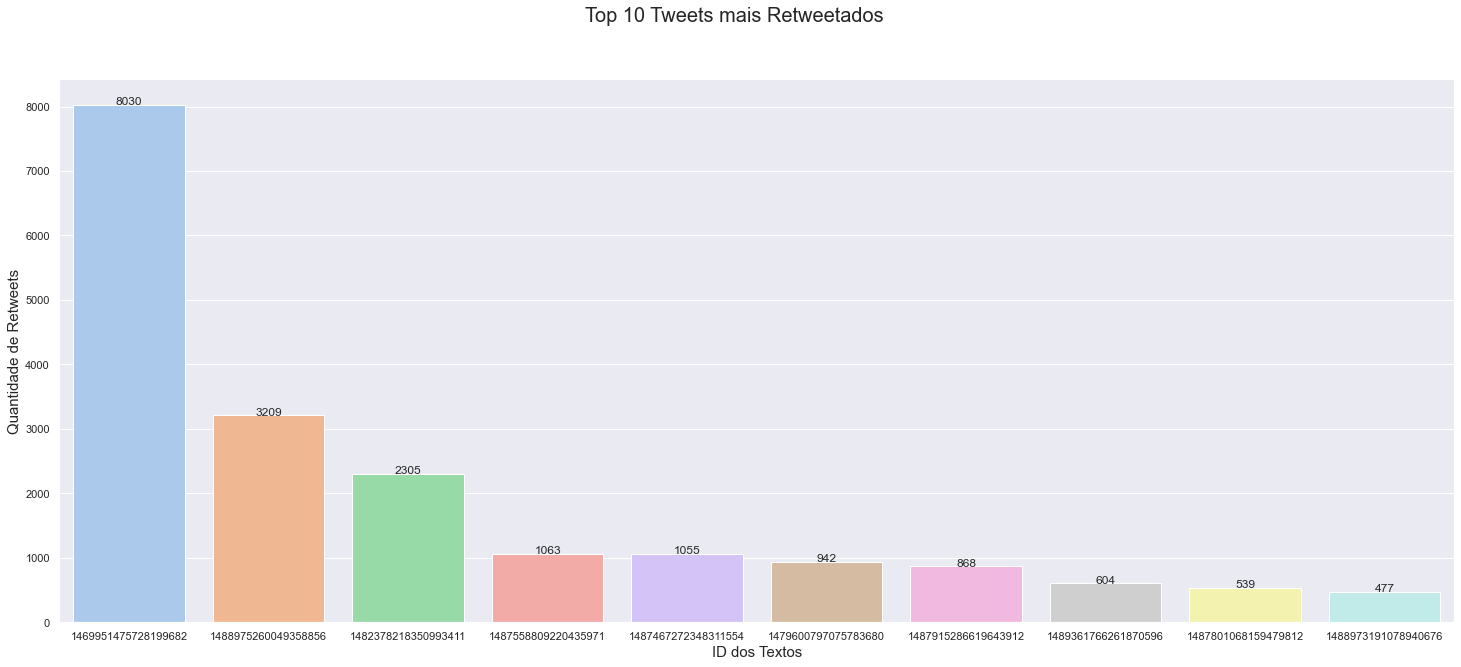

In [102]:
# Top 10 Tweets mais Retweetados
fig, ax = plt.subplots(1, 1, figsize=(25,10))
fig.suptitle('Top 10 Tweets mais Retweetados', fontsize=20)

_ = df.copy()
_ = _[['retweeted_text_id', 'retweeted_text', 'retweet_count']]
_ = _.drop_duplicates().sort_values('retweet_count', ascending=False).head(10)

sns.barplot(data = _, x = 'retweeted_text_id', y = 'retweet_count', ax = ax)
ax.set_ylabel('Quantidade de Retweets', fontsize=15)
ax.set_xlabel('ID dos Textos', fontsize=15)

for p in ax.patches:
    try:
        a = int(p.get_height())
        if a != 0:
            ax.annotate('{0:2d}'.format(a), (p.get_x() + 0.4, p.get_height() + 5), ha='center')   
        else:
            continue
    except:
        continue

In [113]:
# Textos mais retweetados:
pd.set_option('display.max_colwidth', None)

_ = df.copy()
_ = _[['retweeted_user_name', 'retweeted_text_id', 'retweeted_text', 'retweet_count']]
_ = _.drop_duplicates().sort_values('retweet_count', ascending=False).head(10)
_.to_csv('tweets.csv')